In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Santa Clara versus Fresno

In [18]:
def graph_labor(df):
    df["Year-Month"] = pd.to_datetime(df["Year-Month"])
    # sns.set_theme(style="whitegrid")
    plt.figure(figsize=(12, 6))
    sns.lineplot(x="Year-Month", y="Employment", data=df, marker="o")
    plt.title("Employment Over Time")
    plt.xlabel("Year")
    plt.ylabel("Employment")
    plt.xticks(rotation=45)
    plt.show()

def graph_real_estate(df):
    df["Date"] = pd.to_datetime(df["Date"])
    sns.set_theme()
    plt.figure(figsize=(14, 7))
    sns.lineplot(x="Date", y="Price", data=df, marker="o")
    plt.title("Price Trend Over Time")
    plt.xlabel("Year")
    plt.ylabel("Price")
    plt.xticks(rotation=45)
    plt.show()

# Plot Santa Clara and Fresno together
def graph_real_estates(df, hue_column, vline=None):
    df["Date"] = pd.to_datetime(df["Date"])
    sns.set_theme()
    plt.figure(figsize=(14, 7))

    # Use hue to differentiate between multiple lines
    sns.lineplot(x="Date", y="Price", hue=hue_column, data=df, marker="o")

    if vline:
        plt.axvline(pd.to_datetime(vline), color="red", linestyle="--", label=f"Treatment: {vline}")

    plt.title("Price Trend Over Time")
    plt.xlabel("Year")
    plt.ylabel("Price")
    plt.xticks(rotation=45)
    plt.legend(title=hue_column)
    plt.show()

# Plot Santa Clara and Fresno together
def graph_labors(df, hue_column, vline=None):
    df["Year-Month"] = pd.to_datetime(df["Year-Month"])
    # sns.set_theme(style="whitegrid")
    plt.figure(figsize=(12, 6))
    sns.set_theme()
    sns.lineplot(x="Year-Month", y="Employment", hue=hue_column, data=df, marker="o")

    if vline:
        plt.axvline(pd.to_datetime(vline), color="red", linestyle="--", label=f"Treatment: {vline}")

    plt.title("Employment Over Time")
    plt.xlabel("Year")
    plt.ylabel("Employment")
    plt.xticks(rotation=45)
    plt.legend(title=hue_column)
    plt.show()

In [10]:
# Fresno employment and real estate graphs
fresno_employment = pd.read_csv("./data/processed_employment/Fresno_County,_California.csv")
fresno_real_estate = pd.read_csv("./data/processed_zillow/Fresno_County.csv")

sc_employment = pd.read_csv(
    "./data/processed_employment/Santa_Clara_County,_California.csv"
)
sc_real_estate = pd.read_csv("./data/processed_zillow/Santa_Clara_County.csv")

sm_employment = pd.read_csv(
    "./data/processed_employment/San_Mateo_County,_California.csv"
)
sm_real_estate = pd.read_csv("./data/processed_zillow/San_Mateo_County.csv")


# graph_labor(fresno_employment)
# graph_real_estate(fresno_real_estate)

# print(fresno_employment.describe())
# print(fresno_real_estate.describe())

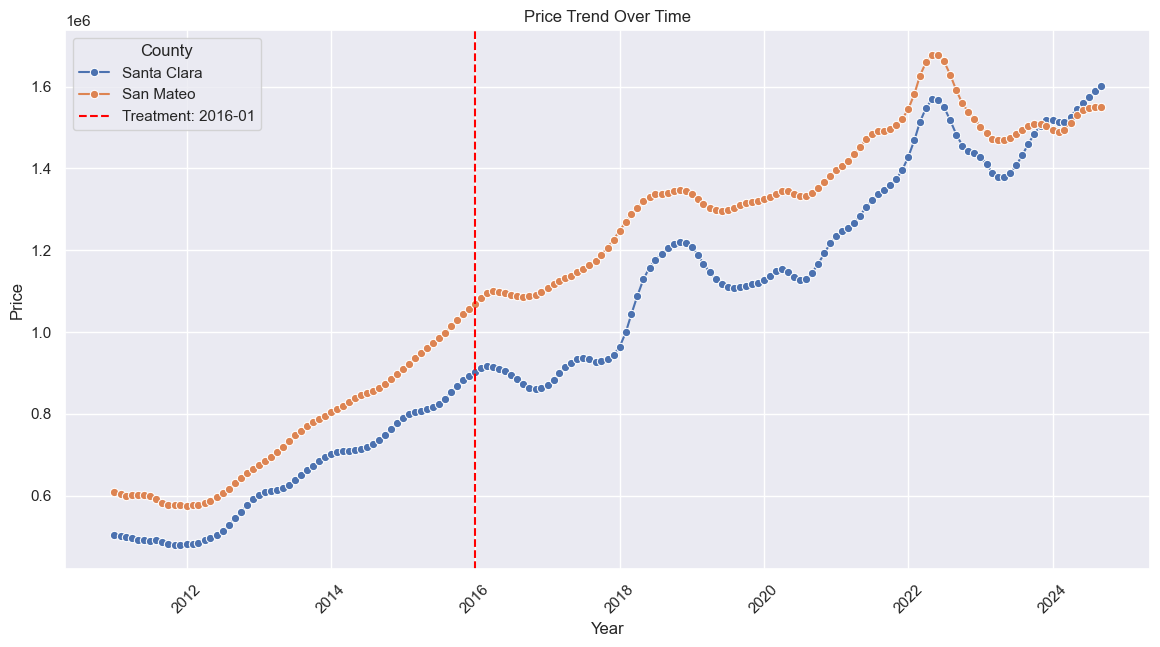

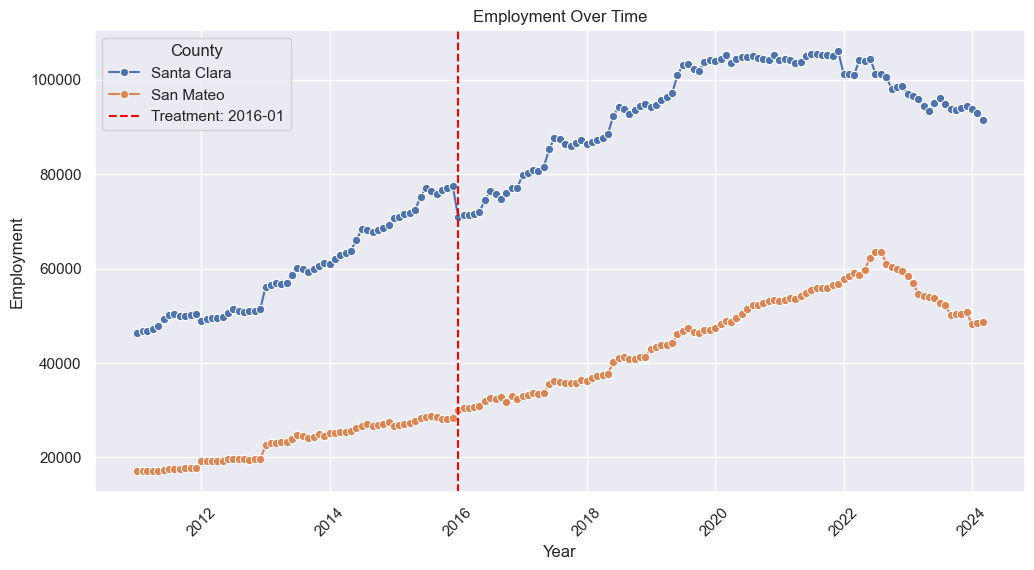

In [23]:
# SC vs SM

sc_real_estate["County"] = "Santa Clara"
sm_real_estate["County"] = "San Mateo"
sc_employment["County"] = "Santa Clara"
sm_employment["County"] = "San Mateo"

sc_and_sm_real_estate = pd.concat([sc_real_estate, sm_real_estate], axis = 0)
sc_and_sm_labors = pd.concat([sc_employment, sm_employment], axis = 0)

graph_real_estates(sc_and_sm_real_estate, "County", "2016-01")
graph_labors(sc_and_sm_labors, "County", "2016-01")

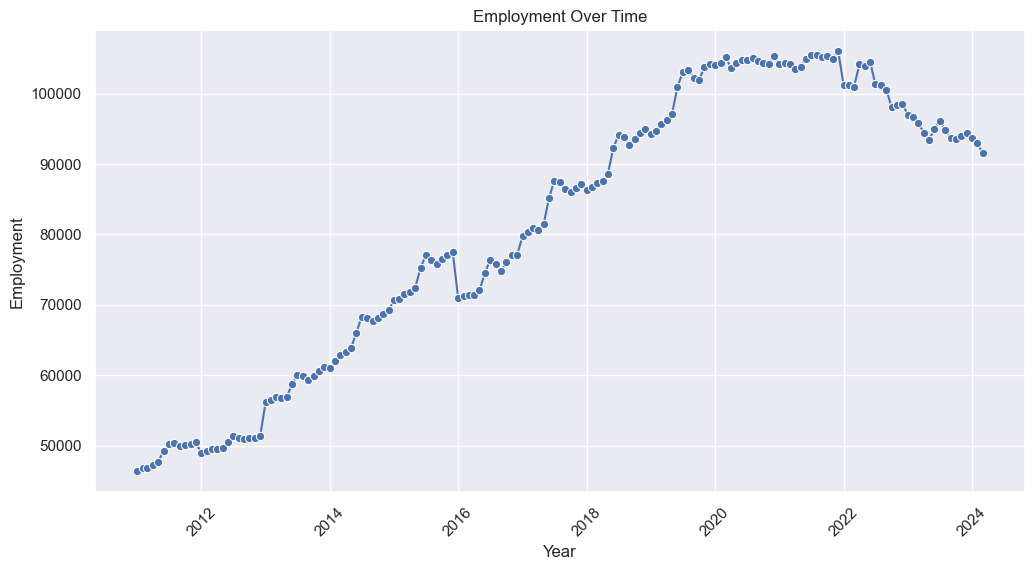

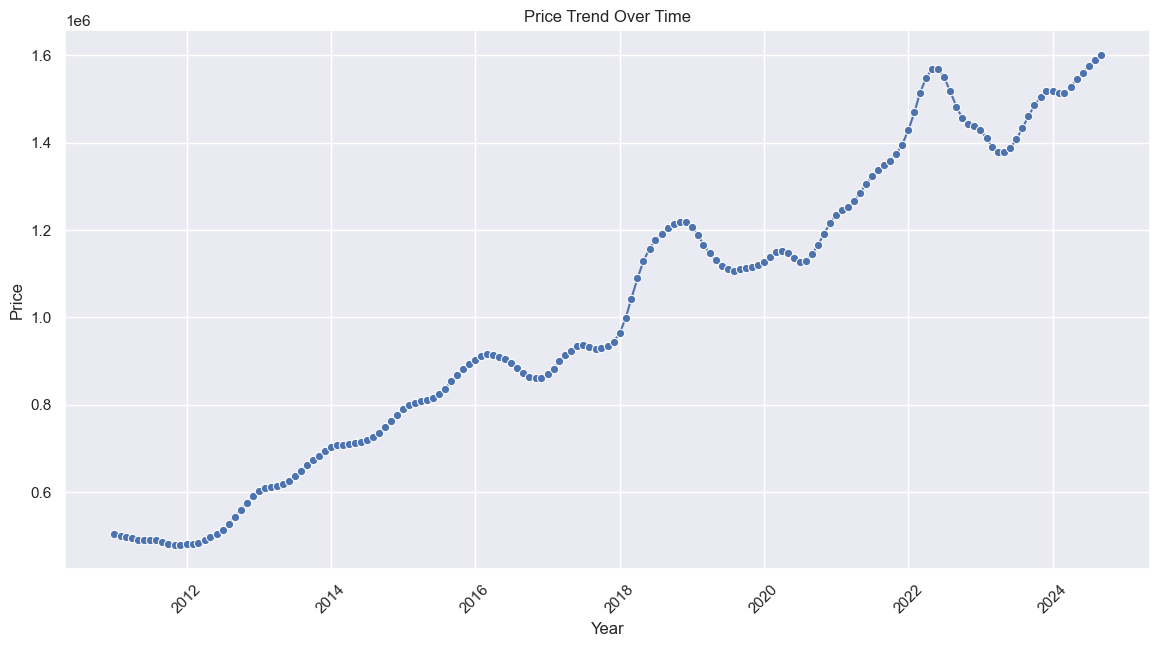

In [5]:
# Santa Clara employment and real estate graphs
sc_employment = pd.read_csv(
    "./data/processed_employment/Santa_Clara_County,_California.csv"
)
sc_real_estate = pd.read_csv("./data/processed_zillow/Santa_Clara_County.csv")

graph_labor(sc_employment)
graph_real_estate(sc_real_estate)

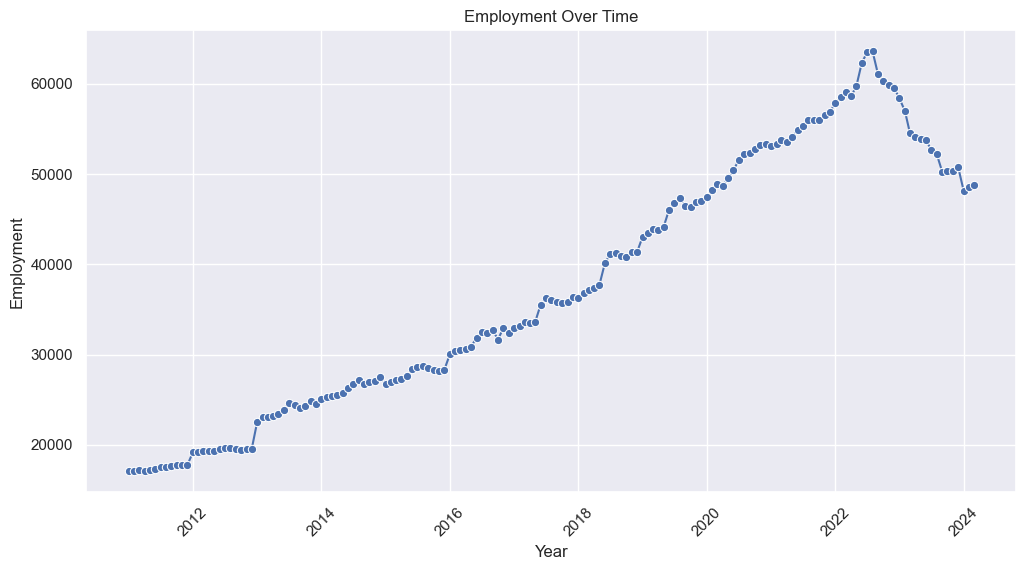

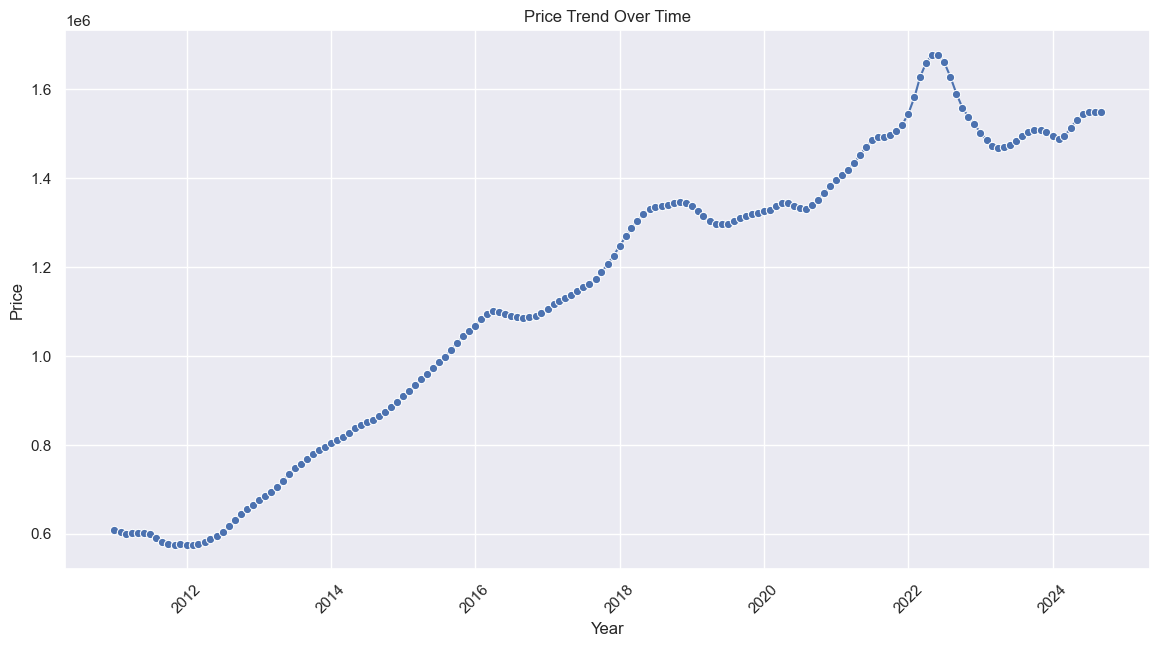

In [6]:
# Sant Mateo employment and real estate graphs
sm_employment = pd.read_csv(
    "./data/processed_employment/San_Mateo_County,_California.csv"
)
sm_real_estate = pd.read_csv("./data/processed_zillow/San_Mateo_County.csv")

graph_labor(sm_employment)
graph_real_estate(sm_real_estate)

In [28]:
import statsmodels.formula.api as smf

sc_real_estate["county"] = "Santa Clara"
fresno_real_estate["county"] = "Fresno"

sc_real_estate["Date"] = pd.to_datetime(sc_real_estate["Date"])
fresno_real_estate["Date"] = pd.to_datetime(fresno_real_estate["Date"])

# Concatenate dataframes
data = pd.concat([sc_real_estate, fresno_real_estate])


data["treatment"] = data["county"].apply(lambda x: 1 if x == "Santa Clara" else 0)
# Define post variable based on intervention year, e.g., 2020
intervention_year = 2012
intervention_date = pd.to_datetime(f"{intervention_year}-01-01")
data["post"] = data["Date"].apply(lambda x: 1 if x >= intervention_date else 0)

# Interaction term for DiD
data["treatment_post"] = data["treatment"] * data["post"]
print(data.head(50))
model = smf.ols(
    "Price ~ treatment + post + treatment_post", data=data
).fit(cov_type='cluster', cov_kwds={'groups': data['county']})
print(model.summary())

         Date   Price       County       county  treatment  post  \
0  2011-01-01  504038  Santa Clara  Santa Clara          1     0   
1  2011-02-01  500356  Santa Clara  Santa Clara          1     0   
2  2011-03-01  498355  Santa Clara  Santa Clara          1     0   
3  2011-04-01  495651  Santa Clara  Santa Clara          1     0   
4  2011-05-01  491514  Santa Clara  Santa Clara          1     0   
5  2011-06-01  491040  Santa Clara  Santa Clara          1     0   
6  2011-07-01  490094  Santa Clara  Santa Clara          1     0   
7  2011-08-01  491445  Santa Clara  Santa Clara          1     0   
8  2011-09-01  486773  Santa Clara  Santa Clara          1     0   
9  2011-10-01  481143  Santa Clara  Santa Clara          1     0   
10 2011-11-01  480105  Santa Clara  Santa Clara          1     0   
11 2011-12-01  479770  Santa Clara  Santa Clara          1     0   
12 2012-01-01  480794  Santa Clara  Santa Clara          1     1   
13 2012-02-01  480972  Santa Clara  Santa Clara 

/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


In [26]:
from stargazer.stargazer import Stargazer
import statsmodels.formula.api as smf

sc_real_estate["county"] = "Santa Clara"
sm_real_estate["county"] = "San Mateo"

sc_real_estate["Date"] = pd.to_datetime(sc_real_estate["Date"])
sm_real_estate["Date"] = pd.to_datetime(sm_real_estate["Date"])

# Concatenate dataframes
data = pd.concat([sc_real_estate, sm_real_estate])

print(data)

data["treatment"] = data["county"].apply(lambda x: 1 if x == "Santa Clara" else 0)
# Define post variable based on intervention year, e.g., 2020
intervention_year = 2016
intervention_date = pd.to_datetime(f"{intervention_year}-01-01")
data["post"] = data["Date"].apply(lambda x: 1 if x >= intervention_date else 0)

# Interaction term for DiD
data["treatment_post"] = data["treatment"] * data["post"]

model = smf.ols("Price ~ treatment + post + treatment_post", data=data).fit()
print(model.summary())

stargazer = Stargazer([model])

# Set table options (optional)
stargazer.title("Regression Results")
stargazer.custom_columns(["OLS Regression"], [1])  # Custom header columns
stargazer.show_degrees_of_freedom(False)  # Optional: Hides degrees of freedom

# Render the table in LaTeX format
latex_table = stargazer.render_latex()

# Print the LaTeX code (for copying into a LaTeX document)
print(latex_table)

          Date    Price       County       county
0   2011-01-01   504038  Santa Clara  Santa Clara
1   2011-02-01   500356  Santa Clara  Santa Clara
2   2011-03-01   498355  Santa Clara  Santa Clara
3   2011-04-01   495651  Santa Clara  Santa Clara
4   2011-05-01   491514  Santa Clara  Santa Clara
..         ...      ...          ...          ...
160 2024-05-01  1531926    San Mateo    San Mateo
161 2024-06-01  1543690    San Mateo    San Mateo
162 2024-07-01  1548980    San Mateo    San Mateo
163 2024-08-01  1549801    San Mateo    San Mateo
164 2024-09-01  1549883    San Mateo    San Mateo

[330 rows x 4 columns]
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     289.9
Date:                Sun, 08 Dec 2024   Prob (F-statistic): 

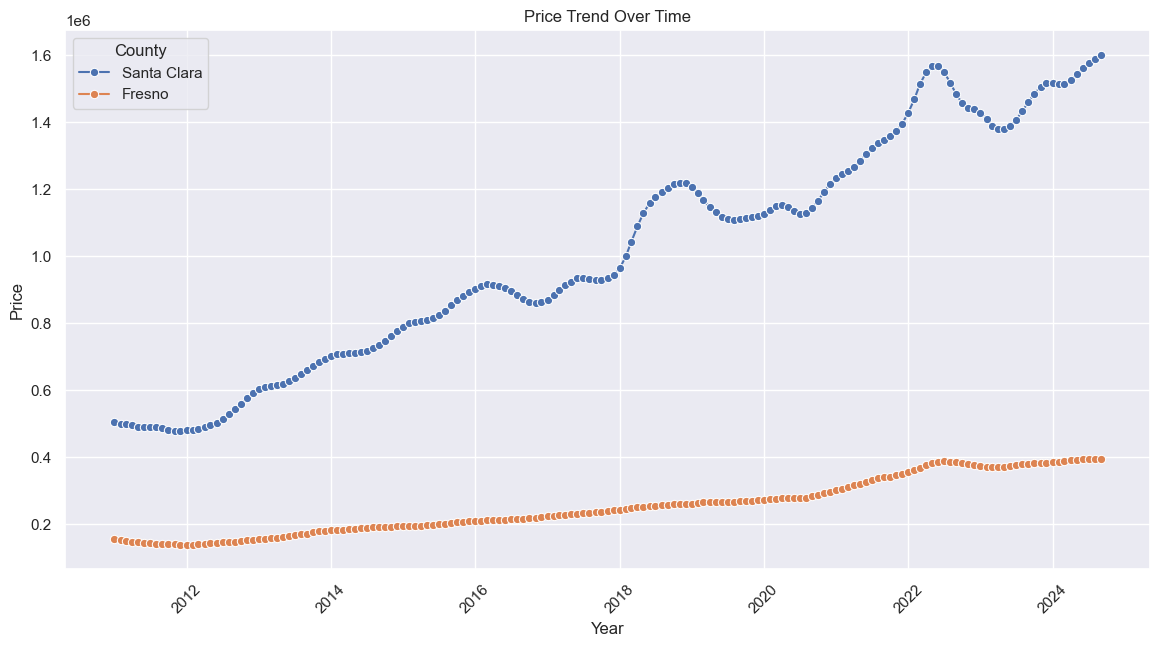

In [38]:
# Plot Santa Clara and Fresno together
def graph_real_estates(df, hue_column):
    df["Date"] = pd.to_datetime(df["Date"])
    sns.set_theme()
    plt.figure(figsize=(14, 7))

    # Use hue to differentiate between multiple lines
    sns.lineplot(x="Date", y="Price", hue=hue_column, data=df, marker="o")

    plt.title("Price Trend Over Time")
    plt.xlabel("Year")
    plt.ylabel("Price")
    plt.xticks(rotation=45)
    plt.legend(title=hue_column)
    plt.show()

sc_real_estate["County"] = "Santa Clara"
fresno_real_estate["County"] = "Fresno"

sc_and_fresno = pd.concat([sc_real_estate, fresno_real_estate], axis = 0)
sc_and_fresno

graph_real_estates(sc_and_fresno, "County")

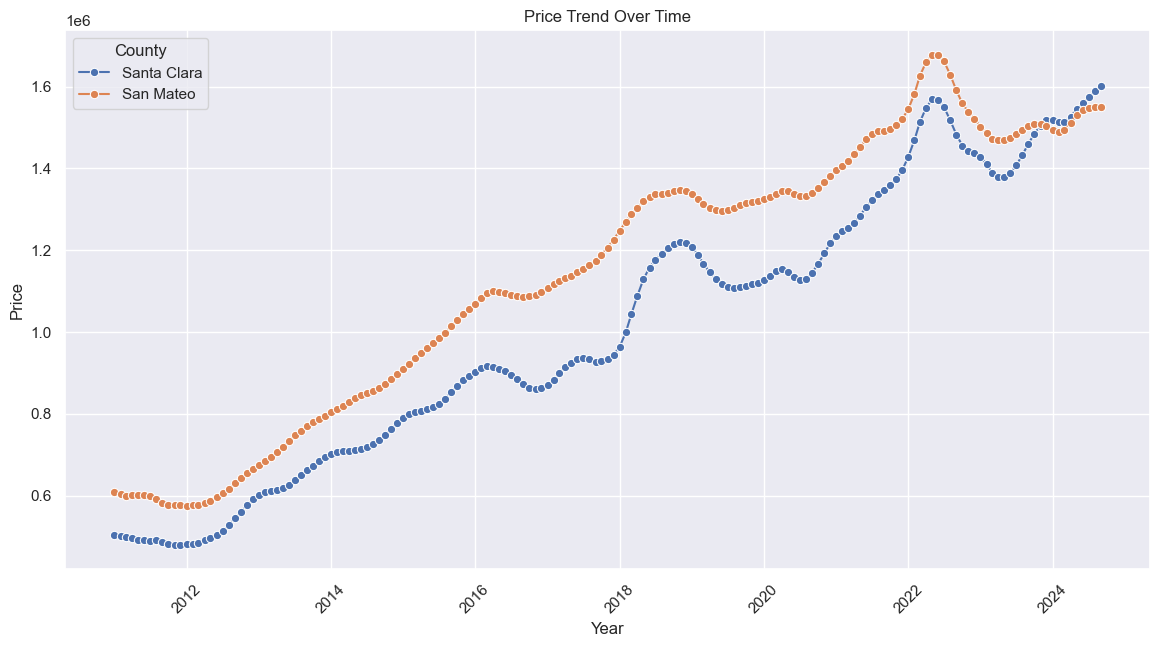

In [45]:
sm_real_estate["County"] = "San Mateo"
sc_and_sm = pd.concat([sc_real_estate, sm_real_estate], axis=0)
graph_real_estates(sc_and_sm, "County")